In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data = make_blobs(n_samples=300,
                  n_features=2,
                  centers=2,
                  cluster_std=1.0,
                  random_state=101)

In [4]:
X, y = data

In [5]:
X[:5]

array([[ -8.87772115,  -6.76007802],
       [  0.630638  ,   3.10707466],
       [ -0.24060881,   2.82068999],
       [ -7.83909113,  -8.20754485],
       [-10.9729082 ,  -7.39067645]])

In [6]:
y[:5]

array([1, 0, 0, 1, 1])

In [7]:
np.random.seed(seed=101)
z_noise = np.random.normal(size=len(X))
z_noise = pd.Series(z_noise)

In [8]:
feat = pd.DataFrame(X)

In [9]:
feat.head()

,0,1
0,-8.877721,-6.760078
1,0.630638,3.107075
2,-0.240609,2.820690
3,-7.839091,-8.207545
4,-10.972908,-7.390676


In [10]:
feat = pd.concat([feat, z_noise], axis=1)

In [11]:
feat.columns = ['X1', 'X2', 'X3']

In [12]:
feat.head()

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


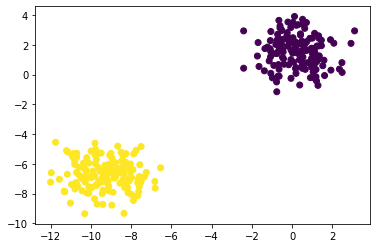

In [13]:
plt.scatter(feat['X1'], feat['X2'], c=y)

In [14]:
from mpl_toolkits.mplot3d import Axes3D

In [15]:
# %matplotlib notebook

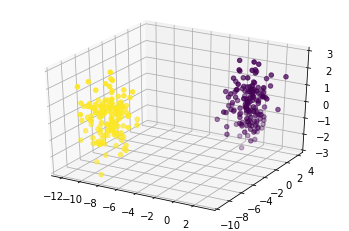

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feat['X1'], feat['X2'], feat['X3'], c=y)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
from tensorflow.keras.optimizers import SGD

In [19]:
encoder = Sequential()
encoder.add(Dense(units=2, activation='relu', input_shape=[3]))

decoder = Sequential()
decoder.add(Dense(units=3, activation='relu', input_shape=[2]))

In [20]:
autoencoder = Sequential([encoder, decoder])

In [21]:
autoencoder.compile(loss='mse', optimizer=SGD(lr=0.01))

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(feat)

In [24]:
autoencoder.fit(scaled_data, scaled_data, epochs=5)

Train on 300 samples
Epoch 1/5
300/300 [==============================] - 0s 652us/sample - loss: 0.2059
Epoch 2/5
300/300 [==============================] - 0s 52us/sample - loss: 0.1888
Epoch 3/5
300/300 [==============================] - 0s 88us/sample - loss: 0.1763
Epoch 4/5
300/300 [==============================] - 0s 76us/sample - loss: 0.1670
Epoch 5/5
300/300 [==============================] - 0s 58us/sample - loss: 0.1601


In [25]:
encoded_2dim = encoder.predict(scaled_data)

In [26]:
encoded_2dim[:5]

array([[0.7381782 , 0.        ],
       [1.7684304 , 0.        ],
       [1.7162343 , 0.        ],
       [0.57196605, 0.        ],
       [0.43612573, 0.        ]], dtype=float32)

In [27]:
encoded_2dim.shape

(300, 2)

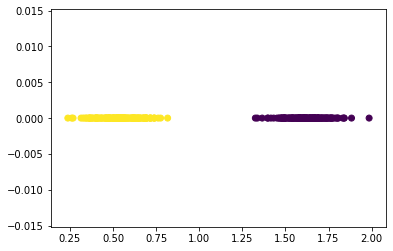

In [28]:
plt.scatter(encoded_2dim[:, 0], encoded_2dim[:, 1], c=y)